<a href="https://colab.research.google.com/github/H4m1l/PrograIII-2025/blob/librerias/uso_librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

In [21]:
ruta = "/content/notas.csv"
try:
  notas = pd.read_csv(ruta, sep=";", encoding="utf-8")
except FileNotFoundError:
  print(f"Error: El archivo no se encontró en la ruta: {ruta}")
  print("Por favor, asegúrese de que el archivo 'notas.csv' esté subido a '/content/'")
  # Creating a dummy DataFrame for demonstration if the file is not found
  data = {'alumno': ['Juan', 'Maria', 'Pedro', 'Ana', 'Luis'],
          'nota': [7, 5, 8, 4, 9]}
  notas = pd.DataFrame(data)

Error: El archivo no se encontró en la ruta: /content/notas.csv
Por favor, asegúrese de que el archivo 'notas.csv' esté subido a '/content/'


In [22]:
print(notas)

  alumno  nota
0   Juan     7
1  Maria     5
2  Pedro     8
3    Ana     4
4   Luis     9


In [23]:
print( notas["alumno"][0] )

Juan


In [24]:
#saca el listado de los alumnos aprobados
aprobados  = notas[ notas["nota"]>=6 ]
print(aprobados)

  alumno  nota
0   Juan     7
2  Pedro     8
4   Luis     9


In [25]:
#sacar el listado de los alumnos reprobados
reprobados = notas[ notas["nota"]<6 ]
print(reprobados)

  alumno  nota
1  Maria     5
3    Ana     4


In [26]:
print("Cantidad de Alumnos aprobados", len(aprobados))

cantidad_aprobados = notas.loc[ notas["nota"]>=6 ].agg({"count"})
print(cantidad_aprobados)

Cantidad de Alumnos aprobados 3
       alumno  nota
count       3     3


In [27]:
print("Cantidad de Alumnos reprobados", len(reprobados))

cantidad_reprobados = notas.loc[ notas["nota"]<6 ].agg({"count"})
print(cantidad_reprobados)

Cantidad de Alumnos reprobados 2
       alumno  nota
count       2     2


In [28]:
grupo_notas = notas.groupby(["nota"]).agg({
    'alumno': lambda n: ', '.join( map(str,n) )
})
print(grupo_notas)

     alumno
nota       
4       Ana
5     Maria
7      Juan
8     Pedro
9      Luis


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
notas['estado'] = notas['nota'].apply(lambda n: 'aprobado' if n >= 6 else 'reprobado')

/tmp/ipython-input-3625859284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=notas, x='estado', palette={'aprobado': 'green', 'reprobado': 'red'})


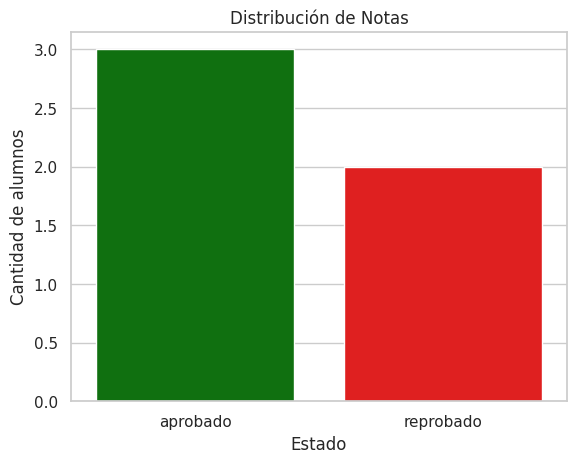

In [31]:
sns.set(style="whitegrid")
# Fix: Correct the palette argument syntax and use y instead of n for the countplot
sns.countplot(data=notas, x='estado', palette={'aprobado': 'green', 'reprobado': 'red'})
plt.title('Distribución de Notas')
plt.xlabel('Estado')
plt.ylabel('Cantidad de alumnos')
plt.show()